# Image Patterns from a Circular Source behind a SIS Lens

Demonstrating the images arising from viewing a circular source from behind a Single Isothermal Sphere (SIS) gravitational lens. 

Galaxies are often modelled by a SIS: this is the simplest model which can reproduce the observed flat rotation curves of spiral galaxies.
An isothermal model assumes that stars and other mass components in a galaxy behave like particles of an ideal gas in thermal equilibrium, confined by their combined spherical symmetric gravitational potential.

We observe the different images formed when the circular source lies:
1. inside the Einstein radius (2 images)
2. exactly on the Einstein radius (2 images)
3. outside the Einstein radius (only 1 image)

In [2]:
#import the necessary packages
from numpy import *
from matplotlib.pyplot import *
rcParams.update({'font.family':'serif','font.size':12,'text.usetex':False,'figure.figsize':[6,6]})

In [3]:
#define data

# Einstein radius
re=1.0

# Three positions of the source center and its radius
betacx=[0.3,0.71,1.0]
betacy=[0.3,0.71,1.0]
rs=0.2

# Parametrizing variable
dphi=pi/1000.0
phi=arange(dphi,2.0*pi+dphi,dphi)

In [4]:
#calculate the einstein ring
thex=[re*cos(t) for t in phi]
they=[re*sin(t) for t in phi]

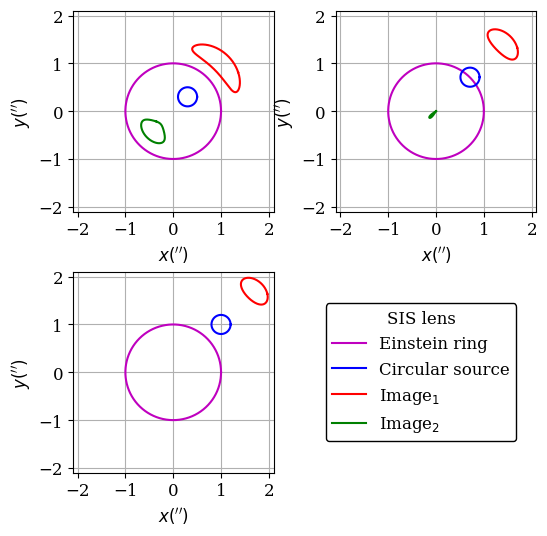

In [5]:
# Loop through all three positions of the source center
for i in range(1,4):
#   Source positions
    betax=[betacx[i-1]+rs*cos(t) for t in phi]
    betay=[betacy[i-1]+rs*sin(t) for t in phi]
    beta=sqrt(array(betax)**2+array(betay)**2)
#   The first image which exists always
    theta1=beta+re
    theta1x=theta1*betax/beta
    theta1y=theta1*betay/beta
#   The second image which exists only if beta < re
    theta2=beta-re
    theta2x=[theta2[k]*betax[k]/beta[k] for k in range(len(beta)) if beta[k]<re]
    theta2y=[theta2[k]*betay[k]/beta[k] for k in range(len(beta)) if beta[k]<re]
#   Plot the results
    subplot(220+i,aspect='equal')
    plot(thex,they,'m-',betax,betay,'b-',theta1x,theta1y,'r-',theta2x,theta2y,'g-')
    grid(True)
    xlim(-2.1,2.1)
    ylim(-2.1,2.1)
    xticks(arange(-2.0,2.1,1.0))
    yticks(arange(-2.0,2.1,1.0))
    tick_params(axis='both',which='major')
    xlabel(r'$x(^{\prime\prime})$')
    ylabel(r'$y(^{\prime\prime})$')

subplots_adjust(wspace=0.3,hspace=0.3)
legend(['Einstein ring','Circular source','Image$_{1}$','Image$_{2}$'],title='SIS lens',\
        loc ='center right',bbox_to_anchor=(2.25,0.5),framealpha=1.0,edgecolor='black')

# Save the figure
savefig('sisl_circs.jpg',dpi=300,bbox_inches='tight')
show()